# Required Libraries

In [27]:
!pip install numpy
!pip install pandas
!pip install matplotlib
!pip install seaborn
!pip install scikit-learn
!pip install tqdm

^C


In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import time

from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

from tqdm import tqdm
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

In [27]:
dataset = pd.read_csv('obesity_data.csv')
dataset.head()

,Age,Gender,Height,Weight,BMI,PhysicalActivityLevel,ObesityCategory
0,56,Male,173.575262,71.982051,23.891783,4,Normal weight
1,69,Male,164.127306,89.959256,33.395209,2,Obese
2,46,Female,168.072202,72.930629,25.817737,4,Overweight
3,32,Male,168.459633,84.886912,29.912247,3,Overweight
4,60,Male,183.568568,69.038945,20.487903,3,Normal weight


In [28]:
# Data Exploration
dataset.describe()

,Age,Height,Weight,BMI,PhysicalActivityLevel
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,49.857000,170.052417,71.205769,24.888317,2.534000
std,18.114267,10.309971,15.509849,6.193912,1.116284
min,18.000000,136.115719,26.065730,8.470572,1.000000
25%,35.000000,163.514205,61.129629,20.918068,2.000000
50%,50.000000,169.801665,71.929072,24.698647,3.000000
75%,66.000000,177.353596,81.133746,28.732132,4.000000
max,79.000000,201.419670,118.907366,50.791898,4.000000


In [29]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


In [30]:
dataset.isnull().sum()

Age                      0
Gender                   0
Height                   0
Weight                   0
BMI                      0
PhysicalActivityLevel    0
ObesityCategory          0
dtype: int64

In [31]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Age                    1000 non-null   int64  
 1   Gender                 1000 non-null   object 
 2   Height                 1000 non-null   float64
 3   Weight                 1000 non-null   float64
 4   BMI                    1000 non-null   float64
 5   PhysicalActivityLevel  1000 non-null   int64  
 6   ObesityCategory        1000 non-null   object 
dtypes: float64(3), int64(2), object(2)
memory usage: 54.8+ KB


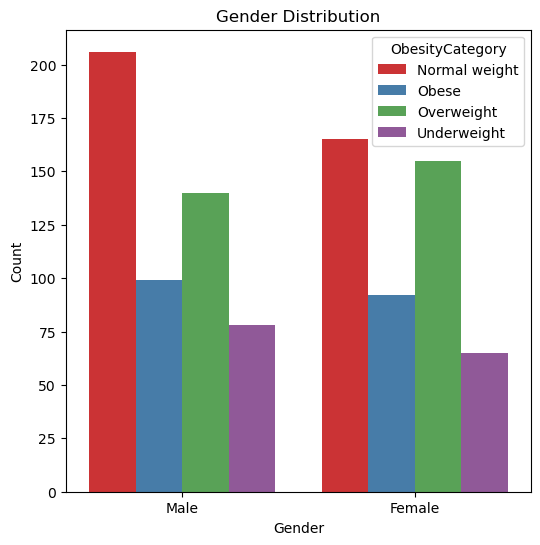

In [32]:
plt.figure(figsize=(6, 6))  # Set the figure size
sns.countplot(x="Gender", data=dataset, palette="Set1", hue='ObesityCategory')  # Use a visually appealing color palette
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Gender Distribution")
plt.show()

0.13.2


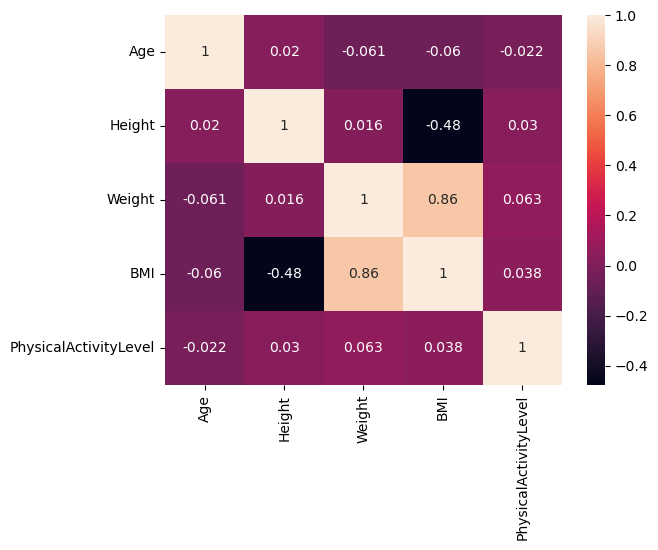

In [33]:
print(sns.__version__)
corr = dataset.drop(["Gender", "ObesityCategory"], axis=1).corr()
sns.heatmap(corr, annot=True)
plt.show()

In [34]:
#Label Encoding
label_encoder = LabelEncoder()
dataset['Gender'] = label_encoder.fit_transform(dataset['Gender'])

In [35]:
X, y = dataset.drop(['ObesityCategory'], axis =1), dataset['ObesityCategory']

<h5>Separating 20% of test data for later use. This is done not to overfit the model for test data</h5>

In [36]:
### Split test data for later testing before training
train, test, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [37]:
# Feature scaling
#scaler = StandardScaler()
#train = scaler.fit_transform(train)
#test = scaler.transform(test)

In [38]:
k_folds = 10
stratified_kfold = StratifiedKFold(n_splits=k_folds, shuffle=True, random_state=42)

<h5>Added different models to train on the dataset</h5>

In [39]:
random_forest_classifier = RandomForestClassifier(random_state=42)
decision_tree_classifier = DecisionTreeClassifier(random_state=42, splitter='best')
knn = KNeighborsClassifier(n_neighbors=10)

MODELS = [random_forest_classifier, decision_tree_classifier, knn]

In [40]:
model_accuracies = []
# Predict accuracy for each model
for model in MODELS:
    model_name = type(model).__name__
    print(model_name)
    accuracy_scores = []
    ### Execute models with K-Fold validation only for training data, spliting it for train, validation and test
    for train_index, test_index in tqdm(stratified_kfold.split(train, train_y), total=k_folds, desc="Cross-validation"):
        # Measure training time
        start_time = time.time()
        X_train, X_test = train.iloc[train_index], train.iloc[test_index]
        y_train, y_test = train_y.iloc[train_index], train_y.iloc[test_index]
        model.fit(X_train, y_train)
        training_time = time.time() - start_time
        print("Training time for {} is {}".format(model_name, training_time))

        # Measure prediction time
        start_time = time.time()
        y_pred = model.predict(X_test)
        prediction_time = time.time() - start_time
        print("Prediction time for {} is {}".format(model_name, prediction_time))
        
        accuracy_score_model = round(accuracy_score(y_test, y_pred), 3)
        accuracy_scores.append(accuracy_score_model)
        

    accuracy_score_avg = np.mean(accuracy_scores)
    print("Average Accuracy: %.2f%%" % (accuracy_score_avg * 100.0))
    # Preodict the accuracy of actual test data
    y_pred = model.predict(test)
    accuracy_score_model = round(accuracy_score(test_y, y_pred), 3)
    model_accuracies.append({"Model": model_name, "Accuracy": accuracy_score_model})
    
    print(confusion_matrix(test_y, y_pred))
    print(classification_report(test_y, y_pred))

RandomForestClassifier


Cross-validation:  20%|██        | 2/10 [00:00<00:01,  4.97it/s]

Training time for RandomForestClassifier is 0.21190094947814941
Prediction time for RandomForestClassifier is 0.015583038330078125
Training time for RandomForestClassifier is 0.18035268783569336
Prediction time for RandomForestClassifier is 0.0


Cross-validation:  40%|████      | 4/10 [00:00<00:01,  5.15it/s]

Training time for RandomForestClassifier is 0.1843571662902832
Prediction time for RandomForestClassifier is 0.008059024810791016
Training time for RandomForestClassifier is 0.17342090606689453
Prediction time for RandomForestClassifier is 0.015624761581420898


Cross-validation:  50%|█████     | 5/10 [00:01<00:01,  4.95it/s]

Training time for RandomForestClassifier is 0.2008359432220459
Prediction time for RandomForestClassifier is 0.015571832656860352


Cross-validation:  70%|███████   | 7/10 [00:01<00:00,  4.90it/s]

Training time for RandomForestClassifier is 0.22246241569519043
Prediction time for RandomForestClassifier is 0.006707906723022461
Training time for RandomForestClassifier is 0.1719982624053955
Prediction time for RandomForestClassifier is 0.015636444091796875


Cross-validation:  80%|████████  | 8/10 [00:01<00:00,  4.93it/s]

Training time for RandomForestClassifier is 0.19991207122802734
Prediction time for RandomForestClassifier is 0.0
Training time for RandomForestClassifier is 0.1864767074584961


Cross-validation:  90%|█████████ | 9/10 [00:01<00:00,  4.84it/s]

Prediction time for RandomForestClassifier is 0.02642679214477539
Training time for RandomForestClassifier is 0.18279743194580078
Prediction time for RandomForestClassifier is 0.01927781105041504


Cross-validation: 100%|██████████| 10/10 [00:02<00:00,  4.87it/s]


Average Accuracy: 99.64%
[[74  0  0  0]
 [ 0 37  1  0]
 [ 0  0 59  0]
 [ 0  0  0 29]]
               precision    recall  f1-score   support

Normal weight       1.00      1.00      1.00        74
        Obese       1.00      0.97      0.99        38
   Overweight       0.98      1.00      0.99        59
  Underweight       1.00      1.00      1.00        29

     accuracy                           0.99       200
    macro avg       1.00      0.99      0.99       200
 weighted avg       1.00      0.99      0.99       200

DecisionTreeClassifier


Cross-validation: 100%|██████████| 10/10 [00:00<00:00, 170.94it/s]


Training time for DecisionTreeClassifier is 0.002271890640258789
Prediction time for DecisionTreeClassifier is 0.004593372344970703
Training time for DecisionTreeClassifier is 0.003998756408691406
Prediction time for DecisionTreeClassifier is 0.0
Training time for DecisionTreeClassifier is 0.0
Prediction time for DecisionTreeClassifier is 0.0
Training time for DecisionTreeClassifier is 0.0
Prediction time for DecisionTreeClassifier is 0.0
Training time for DecisionTreeClassifier is 0.01740264892578125
Prediction time for DecisionTreeClassifier is 0.00099945068359375
Training time for DecisionTreeClassifier is 0.0029969215393066406
Prediction time for DecisionTreeClassifier is 0.0009992122650146484
Training time for DecisionTreeClassifier is 0.0029578208923339844
Prediction time for DecisionTreeClassifier is 0.0011723041534423828
Training time for DecisionTreeClassifier is 0.0029981136322021484
Prediction time for DecisionTreeClassifier is 0.0010006427764892578
Training time for Decisio

Cross-validation:   0%|          | 0/10 [00:00<?, ?it/s]

Training time for KNeighborsClassifier is 0.0013179779052734375
Prediction time for KNeighborsClassifier is 0.0
Training time for KNeighborsClassifier is 0.015737533569335938
Prediction time for KNeighborsClassifier is 0.003194093704223633
Training time for KNeighborsClassifier is 0.0
Prediction time for KNeighborsClassifier is 0.0147705078125
Training time for KNeighborsClassifier is 0.003991603851318359
Prediction time for KNeighborsClassifier is 0.0060002803802490234
Training time for KNeighborsClassifier is 0.002176046371459961
Prediction time for KNeighborsClassifier is 0.007087230682373047
Training time for KNeighborsClassifier is 0.002002716064453125
Prediction time for KNeighborsClassifier is 0.006997346878051758
Training time for KNeighborsClassifier is 0.0
Prediction time for KNeighborsClassifier is 0.0
Training time for KNeighborsClassifier is 0.0


Cross-validation: 100%|██████████| 10/10 [00:00<00:00, 87.30it/s]


Prediction time for KNeighborsClassifier is 0.01566624641418457
Training time for KNeighborsClassifier is 0.004648923873901367
Prediction time for KNeighborsClassifier is 0.007833480834960938
Training time for KNeighborsClassifier is 0.0
Prediction time for KNeighborsClassifier is 0.0
Average Accuracy: 90.36%
[[73  0  1  0]
 [ 0 35  3  0]
 [ 4  2 53  0]
 [ 9  0  0 20]]
               precision    recall  f1-score   support

Normal weight       0.85      0.99      0.91        74
        Obese       0.95      0.92      0.93        38
   Overweight       0.93      0.90      0.91        59
  Underweight       1.00      0.69      0.82        29

     accuracy                           0.91       200
    macro avg       0.93      0.87      0.89       200
 weighted avg       0.91      0.91      0.90       200



                    Model  Accuracy
0  RandomForestClassifier     0.995
1  DecisionTreeClassifier     1.000
2    KNeighborsClassifier     0.905


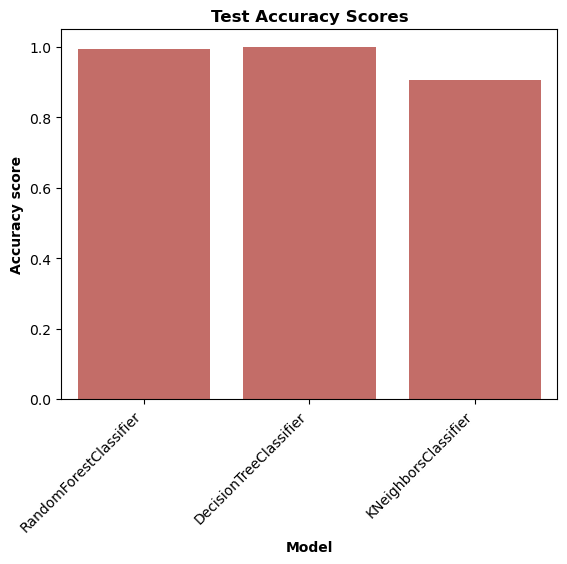

In [41]:
model_accuracies_df = pd.DataFrame(model_accuracies)
print(model_accuracies_df)
sns.set_palette("Spectral", n_colors=6, desat=0.8)

score_plot = sns.barplot(data=model_accuracies_df, y="Accuracy", x="Model")

# rotate the ticks 45 degrees for the sake of redability
plt.xticks(rotation=45, horizontalalignment='right')
plt.title("Test Accuracy Scores",
          fontweight="bold")
plt.xlabel("Model", fontweight="bold")
plt.ylabel("Accuracy score", fontweight="bold")

plt.show()